In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# ======================================
# 1. Membuat Dataset Dummy dengan Target
# ======================================
np.random.seed(42)
num_samples = 2000  # Jumlah sampel
data_features = 6  # Jumlah fitur

# Membuat fitur dengan distribusi normal
X = np.random.randn(num_samples, data_features)

# Membuat target biner dengan logika sederhana (dummy)
# Jika jumlah nilai fitur positif > jumlah negatif, target = 1, sebaliknya = 0
y = (np.sum(X > 0, axis=1) > (data_features // 2)).astype(int)

# Konversi menjadi DataFrame untuk analisis lebih lanjut
data = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(data_features)])
data['target'] = y

# Menyimpan dataset ke file CSV
data.to_csv("Task11DummyData/dummy_dataset.csv", index=False)
print("Dataset dummy disimpan sebagai 'dummy_dataset.csv'")

Dataset dummy disimpan sebagai 'dummy_dataset.csv'


In [3]:
# ============================
# Eksplorasi Data Awal (EDA)
# ============================
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  2000 non-null   float64
 1   feature_2  2000 non-null   float64
 2   feature_3  2000 non-null   float64
 3   feature_4  2000 non-null   float64
 4   feature_5  2000 non-null   float64
 5   feature_6  2000 non-null   float64
 6   target     2000 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 101.7 KB
None


In [4]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())



Statistik Deskriptif:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.002310    -0.001083     0.006245    -0.034704    -0.028952   
std       0.993783     0.995142     0.992300     1.018664     1.020798   
min      -3.221016    -3.232565    -3.922400    -3.688365    -3.836656   
25%      -0.653078    -0.689865    -0.653318    -0.731011    -0.696112   
50%      -0.001698     0.003536     0.007265    -0.032161    -0.039431   
75%       0.671081     0.693496     0.657115     0.619203     0.651592   
max       3.098299     3.193108     3.243093     3.926238     3.377768   

         feature_6       target  
count  2000.000000  2000.000000  
mean      0.019953     0.333000  
std       0.988947     0.471404  
min      -3.033989     0.000000  
25%      -0.625837     0.000000  
50%       0.020709     0.000000  
75%       0.676849     1.000000  
max       3.852731     1.000000  


In [5]:
# Mengecek nilai NaN pada target
nan_count = data['target'].isna().sum()
print(f"\nJumlah nilai NaN pada target: {nan_count}")


Jumlah nilai NaN pada target: 0


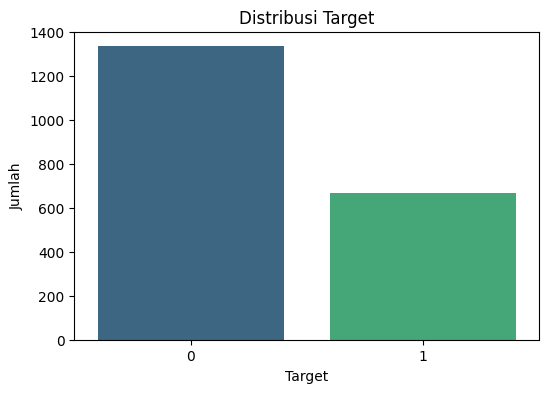

In [6]:
# Mengecek distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribusi Target')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.savefig("target_distribution.png")
plt.show()

In [7]:
# Mengecek nilai unik pada target
unique_values = data['target'].unique()
print(f"\nNilai unik pada target: {unique_values}")


Nilai unik pada target: [0 1]


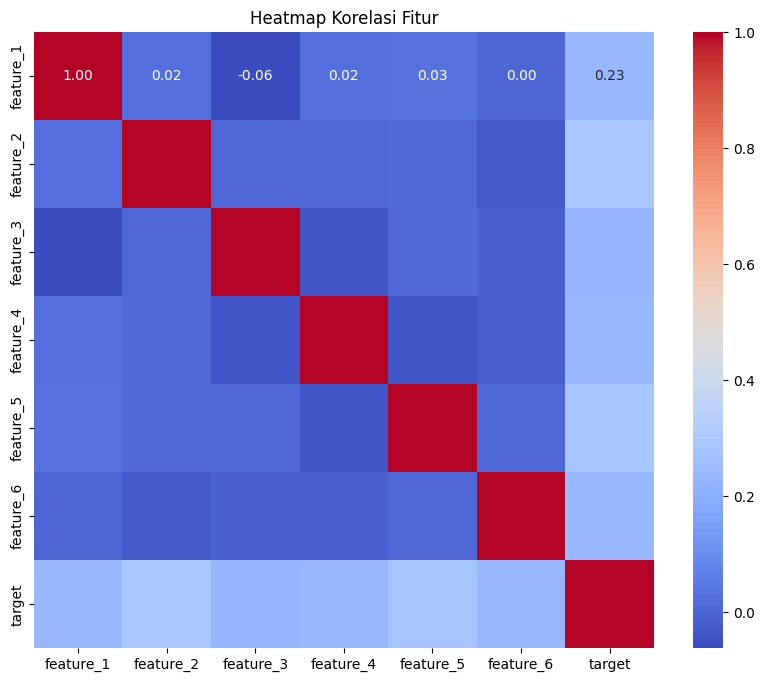

In [8]:
# Heatmap korelasi fitur
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Fitur')
plt.savefig("correlation_heatmap.png")
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


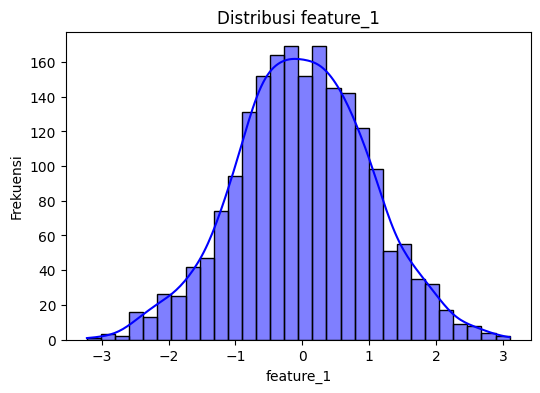

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


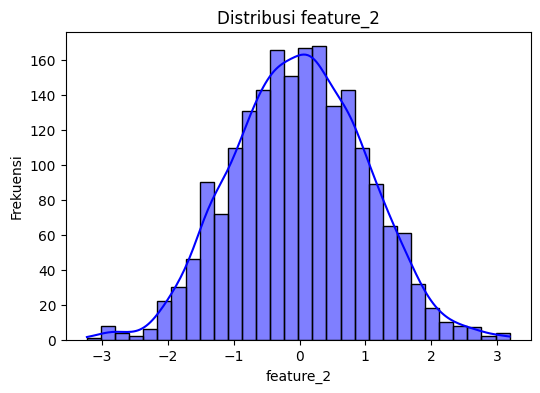

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


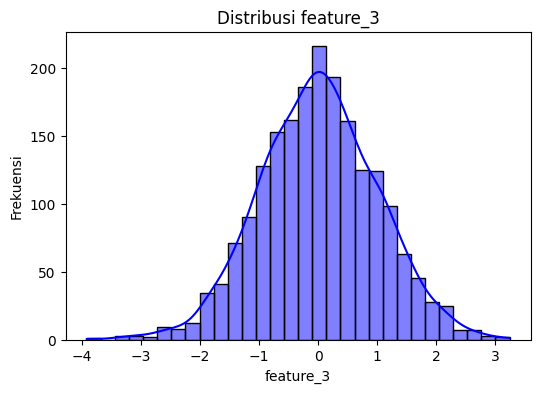

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


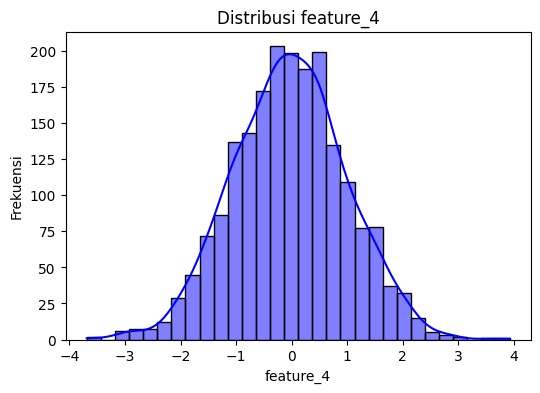

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


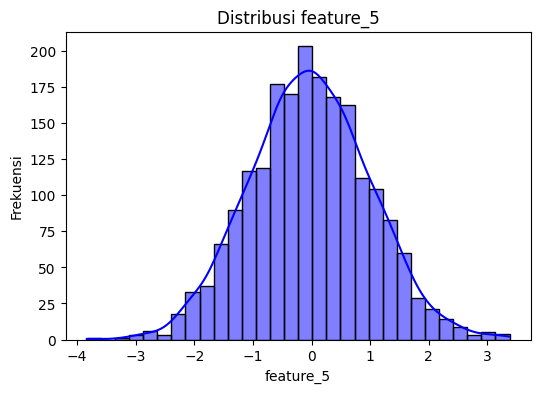

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


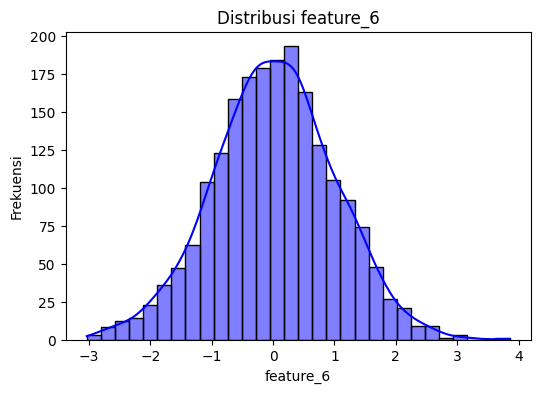

In [9]:
# Distribusi fitur numerik
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.savefig(f"Task11DummyData/{feature}_distribution.png")
    plt.show()

In [10]:
# ===================================
# 3. Split Data Menjadi Train dan Test
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:, :-1], data['target'], test_size=0.2, random_state=42
)

In [11]:
# =====================
# 4. Standarisasi Data
# =====================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi data ke PyTorch Tensor
def convert_to_tensor(X, y):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y.to_numpy(), dtype=torch.long)
    return X_tensor, y_tensor

X_train_tensor, y_train_tensor = convert_to_tensor(X_train, y_train)
X_test_tensor, y_test_tensor = convert_to_tensor(X_test, y_test)

# Membuat DataLoader untuk batch processing
def create_data_loader(X, y, batch_size):
    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Fungsi untuk membuat model MLP
activation_functions = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "Linear": nn.Identity(),
    "Softmax": nn.Softmax(dim=1)
}

def create_mlp_model(input_dim, hidden_layers, activation_fn):
    layers = []
    for i, hidden_units in enumerate(hidden_layers):
        if i == 0:
            layers.append(nn.Linear(input_dim, hidden_units))
        else:
            layers.append(nn.Linear(hidden_layers[i-1], hidden_units))
        layers.append(activation_fn)
    layers.append(nn.Linear(hidden_layers[-1], 2))  # Output layer (2 kelas: 0 dan 1)
    return nn.Sequential(*layers)

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate_model(model, train_loader, X_test, y_test, optimizer, criterion, epochs):
    train_losses = []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))

    # Evaluasi pada data test
    model.eval()
    with torch.no_grad():
        y_test_pred = model(torch.tensor(X_test, dtype=torch.float32))
        test_loss = criterion(y_test_pred, torch.tensor(y_test.to_numpy(), dtype=torch.long)).item()
        test_accuracy = (torch.argmax(y_test_pred, axis=1) == torch.tensor(y_test.to_numpy(), dtype=torch.long)).float().mean().item()

    return train_losses, test_loss, test_accuracy

In [12]:
# 5. Eksperimen Hyperparameter
hyperparameters = {
    "hidden_layers": [[4], [8], [16], [32], [64], [16, 8], [32, 16, 8]],
    "activation_fn": ["ReLU", "Sigmoid", "Tanh", "Linear", "Softmax"],
    "learning_rate": [10, 1, 0.1, 0.01, 0.001, 0.0001],
    "batch_size": [16, 32, 64, 128, 256, 512],
    "epochs": [1, 10, 25, 50, 100, 250]
}

results = []

for hidden_layers in hyperparameters["hidden_layers"]:
    for activation_fn_name in hyperparameters["activation_fn"]:
        activation_fn = activation_functions[activation_fn_name]
        for learning_rate in hyperparameters["learning_rate"]:
            for batch_size in hyperparameters["batch_size"]:
                for epochs in hyperparameters["epochs"]:
                    train_loader = create_data_loader(X_train_tensor, y_train_tensor, batch_size)
                    model = create_mlp_model(X_train.shape[1], hidden_layers, activation_fn)
                    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
                    criterion = nn.CrossEntropyLoss()

                    train_losses, test_loss, test_accuracy = train_and_evaluate_model(
                        model, train_loader, X_test, y_test, optimizer, criterion, epochs
                    )

                    results.append({
                        "hidden_layers": hidden_layers,
                        "activation_fn": activation_fn_name,
                        "learning_rate": learning_rate,
                        "batch_size": batch_size,
                        "epochs": epochs,
                        "test_loss": test_loss,
                        "test_accuracy": test_accuracy
                    })

# Konversi hasil ke DataFrame untuk analisis lebih lanjut
results_df = pd.DataFrame(results)

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

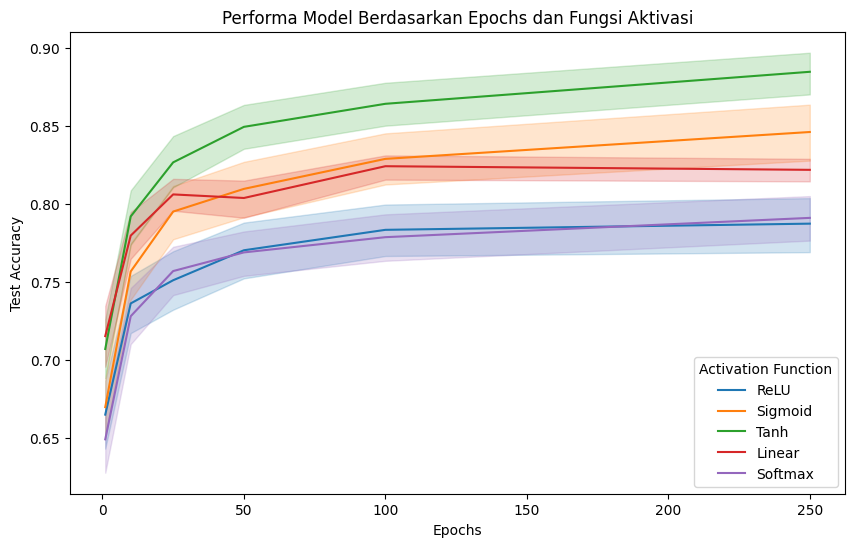

In [15]:
# Visualisasi hasil eksperimen
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="epochs", y="test_accuracy", hue="activation_fn")
plt.title("Performa Model Berdasarkan Epochs dan Fungsi Aktivasi")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.legend(title="Activation Function")
plt.show()




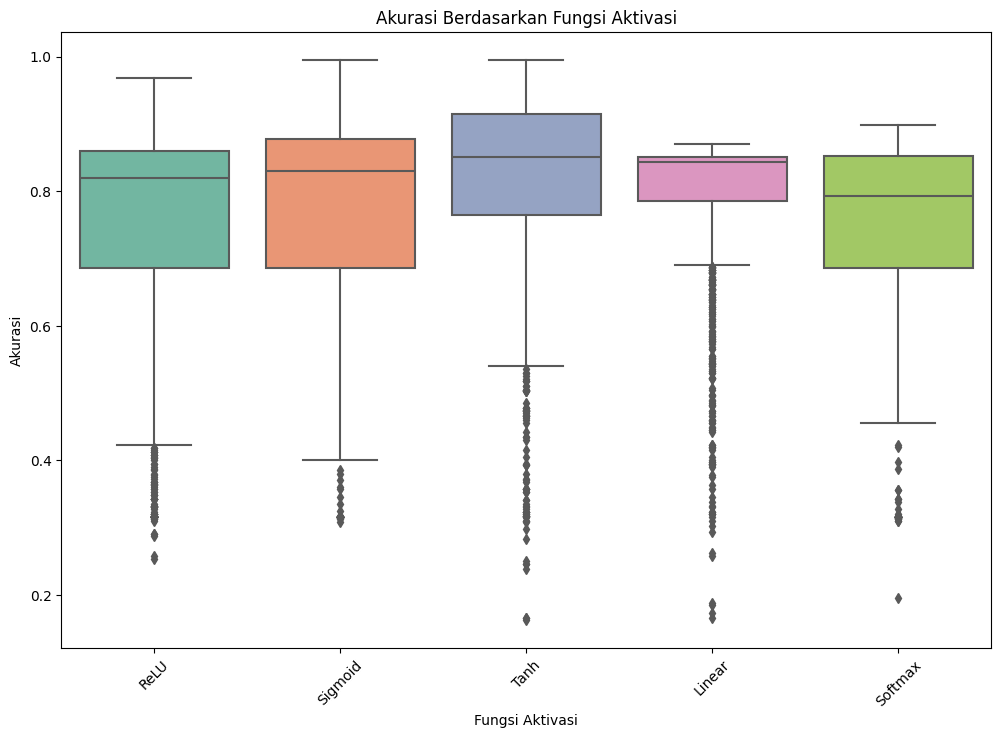

In [16]:
# Visualisasi perbandingan hyperparameter
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, x="activation_fn", y="test_accuracy", palette="Set2")
plt.title("Akurasi Berdasarkan Fungsi Aktivasi")
plt.xlabel("Fungsi Aktivasi")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)
plt.show()

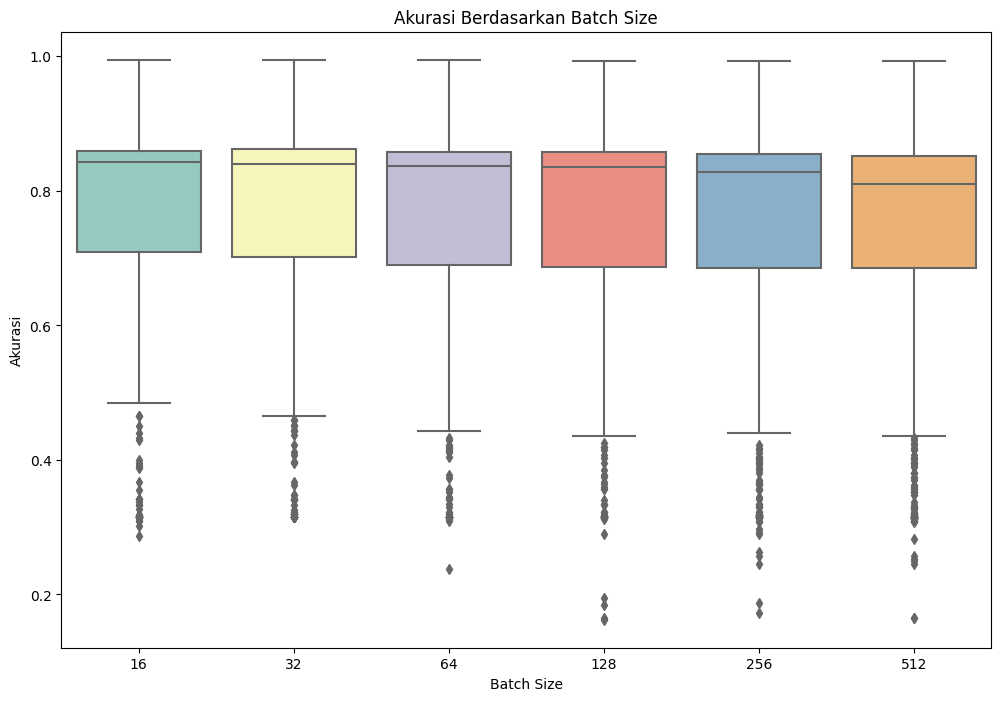

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, x="batch_size", y="test_accuracy", palette="Set3")
plt.title("Akurasi Berdasarkan Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Akurasi")
plt.show()

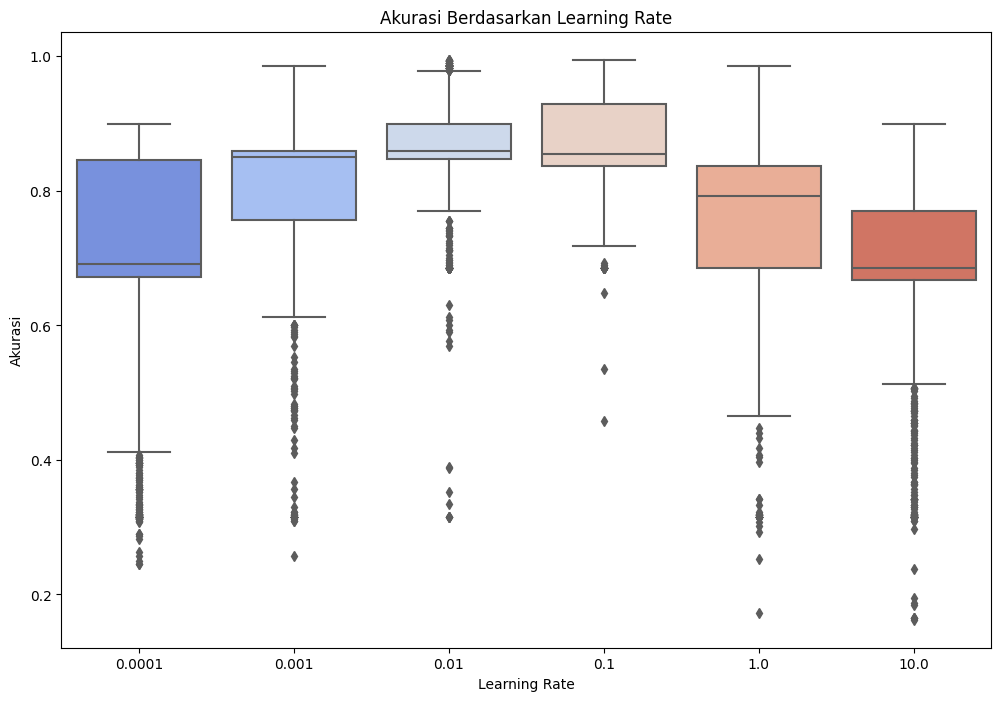

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df, x="learning_rate", y="test_accuracy", palette="coolwarm")
plt.title("Akurasi Berdasarkan Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Akurasi")
plt.show()

In [19]:
# Menyimpan hasil ke file CSV untuk laporan
results_df.to_csv("Task11DummyData/mlp_hyperparameter_results.csv", index=False)

print("Eksperimen selesai. Hasil telah disimpan dalam 'mlp_hyperparameter_results.csv'.")

Eksperimen selesai. Hasil telah disimpan dalam 'mlp_hyperparameter_results.csv'.
